In [1]:
!pip install -U sentence_transformers --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.6 MB/s eta 0:00:00


In [4]:
pip install datasets --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.6 MB/s eta 0:00:00


In [32]:
pip install sentence-transformers scikit-learn pandas torch


In [45]:
import seaborn as sns

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
from sklearn.model_selection import train_test_split


In [14]:
from datasets import load_dataset, Dataset
import pandas as pd

In [68]:
from sklearn.metrics import accuracy_score

In [27]:
df = load_dataset("NickyNicky/Finance_sentiment_and_topic_classification_En")

# Converting 'train' split to a Pandas DataFrame
df = pd.DataFrame(df['train'])


print(df.head())


df.to_csv("train_data.csv", index=False)


     answer                                      system_prompt  \
0   neutral  You are a financial sentiment analysis expert....   
1   neutral  You are a financial sentiment analysis expert....   
2  negative  You are a financial sentiment analysis expert....   
3  positive  You are a financial sentiment analysis expert....   
4  positive  You are a financial sentiment analysis expert....   

                                         user_prompt           task_type  
0  According to Gran , the company has no plans t...  sentiment_analysis  
1  Technopolis plans to develop in stages an area...  sentiment_analysis  
2  The international electronic industry company ...  sentiment_analysis  
3  With the new production plant the company woul...  sentiment_analysis  
4  According to the company 's updated strategy f...  sentiment_analysis  


In [29]:
df.head()

,answer,system_prompt,user_prompt,task_type
0,neutral,You are a financial sentiment analysis expert....,"According to Gran , the company has no plans t...",sentiment_analysis
1,neutral,You are a financial sentiment analysis expert....,Technopolis plans to develop in stages an area...,sentiment_analysis
2,negative,You are a financial sentiment analysis expert....,The international electronic industry company ...,sentiment_analysis
3,positive,You are a financial sentiment analysis expert....,With the new production plant the company woul...,sentiment_analysis
4,positive,You are a financial sentiment analysis expert....,According to the company 's updated strategy f...,sentiment_analysis


In [30]:
df.drop(['system_prompt', 'task_type'], axis=1, inplace=True)

In [31]:
df

,answer,user_prompt
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
61194,Treasuries | Corporate Debt,KfW credit line for Uniper could be raised to ...
61195,Treasuries | Corporate Debt,KfW credit line for Uniper could be raised to ...
61196,Treasuries | Corporate Debt,Russian https://t.co/R0iPhyo5p7 sells 1 bln r...
61197,Treasuries | Corporate Debt,Global ESG bond issuance posts H1 dip as supra...


In [118]:
# only want to keep rows where 'answer' is 'neutral', 'positive', or 'negative'
df_filtered = df[df["answer"].isin(["neutral", "positive", "negative"])]

# Showing the shape of the new DataFrame
print(df_filtered.shape)


(39641, 2)


In [119]:
df_sampled = df_filtered.sample(frac=0.15, random_state=42)  # 15% sample
print(df_sampled.shape)  # Checking new size


(5946, 2)


<Axes: xlabel='answer', ylabel='count'>

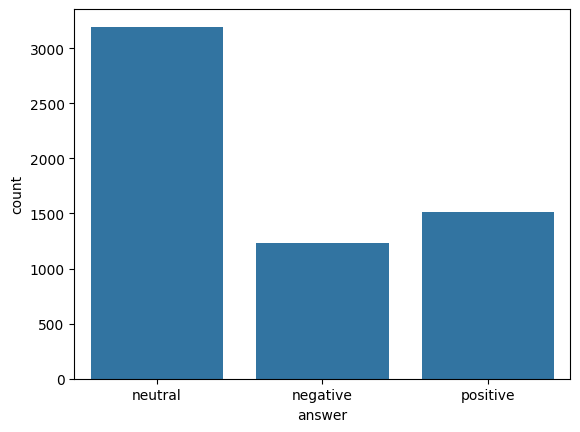

In [120]:
sns.countplot(x=df_sampled["answer"])

In [121]:
# Undersampling each class to match the class with the smallest number of samples
min_class_count = df_sampled["answer"].value_counts().min()

# Sampling an equal number of rows from each class
df_balanced = df_sampled.groupby("answer").apply(lambda x: x.sample(min_class_count, random_state=42)).reset_index(drop=True)

# Showing the new class distribution
print(df_balanced["answer"].value_counts())
print(df_balanced.shape)


answer
negative    1236
neutral     1236
positive    1236
Name: count, dtype: int64
(3708, 2)


<ipython-input-121-da2c42553870>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_sampled.groupby("answer").apply(lambda x: x.sample(min_class_count, random_state=42)).reset_index(drop=True)


In [122]:
# Load model
from sentence_transformers import SentenceTransformer # import the SentenceTransformer class
model = SentenceTransformer("all-MiniLM-L6-v2")

# Converting text to embeddings
X = model.encode(df_balanced["user_prompt"].tolist(), convert_to_numpy=True)

In [123]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_balanced["answer"])

# Saving the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [125]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.54      0.60       277
           1       0.61      0.78      0.69       237
           2       0.54      0.51      0.53       228

    accuracy                           0.61       742
   macro avg       0.61      0.61      0.61       742
weighted avg       0.61      0.61      0.61       742



In [127]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset


dataset = Dataset.from_pandas(df_balanced)


#dataset = dataset.filter(lambda e: e['answer'] is not None and len(e['answer']) > 0)


#dataset = dataset.map(lambda e: {'labels': label_encoder.transform([e['answer']])[0]}, batched=False) # Transform expects a list


#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    eval_dataset=dataset,
)

trainer.train()

ValueError: No columns in the dataset match the model's forward method signature. The following columns have been ignored: [user_prompt, answer]. Please check the dataset and model. You may need to set `remove_unused_columns=False` in `TrainingArguments`.

In [133]:
new_texts = ["Our new product has received great feedback"]
new_embeddings = model.encode(new_texts, convert_to_numpy=True)
predicted_label = clf.predict(new_embeddings)

# Convert back to original label names
decoded_label = label_encoder.inverse_transform(predicted_label)
print("Predicted Label:", decoded_label[0])


Predicted Label: positive
